# 0. Overview
- Dataset: https://www.kaggle.com/c/titanic/overview
- Reference: https://www.kaggle.com/rbud613/taitanic-eda/comments#846113
- Pre-requisite:
    - Knowledge of numpy and Python pandas;
    - Knowledge of machine learning concepts;
    - Passion to learn;
    - Ready to ask question (to both Google and your Tech Lead).
- Objective:
    - Understanding the basic ML model building procedure (for classification problem).

---------

# 1. Get Started
- **Overview**: 在这个部分，你将【读取】这个项目需要的数据

## 1.1. Getting the Data
- 首先，我们来看看我们要处理的数据长什么样
- 如你们所见，这个数据集包括了许多 Titanic 乘客的信息
- 这个部分有 **1 个 TODO** 

In [2]:
import numpy as np
import pandas as pd

**TODO 1.1:** Use pandas libary to read in the data we need (i.e. train.csv & test.csv)

In [3]:
# Your Code Starts Here
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# First few lines of training set (i.e. the data WITH known labels)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# First few lines of test set (i.e. the data WITHOUT known labels)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


![Data Dictionary](./data/data_dictionary.png)


- 变量名 (aka passenger info)
    - pclass: 仓位等级
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    - age: 年龄。Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    - sibsp: 同辈亲人（兄弟姐妹、配偶）。The dataset defines family relations in this way...
        - Sibling = brother, sister, stepbrother, stepsister
        - Spouse = husband, wife (mistresses and fiancés were ignored)

    - parch: 非同辈亲人（子女、父母）。The dataset defines family relations in this way...
        - Parent = mother, father
        - Child = daughter, son, stepdaughter, stepson
        - Some children travelled only with a nanny, therefore parch=0 for them.

- **Take a few minutes to look at the dataset and get an idea of it**
---------

# 2. Prediction
## 2.0 概述
- 在这个部分，我们会进行这个项目的核心环节：通过乘客们的信息来预测他们是否会在 titanic 沉船案中生存下来。
- 这个部分有 **1 个 TODO**

- 数据已经被分成了两部分：
  - 训练集 (data/train.csv)
  - 测试集 (data/test.csv)

- **训练集**将用来训练机器学习模型，因此我们将提供**真实**的分类答案（i.e. label），也就是说，对于训练集中的每一位乘客，我们都将有他们**是否存活**的数据 (在**Survived**那一列)

- **测试集**将用来测试我们的模型。因此我们**没有提供**真实的分类答案（i.e. label）。你在这个部分的主要工作就是用你训练出来的模型来预测每个乘客是否会在这场灾难里活下来。

- **最终提交**的结果需要遵循`gender_submission.csv`这个表格的格式。It is a set of predictions that **assume** all and only female passengers survive, as an example of what a submission file should look like.

`References`: 
- 1. https://www.kaggle.com/c/titanic/overview
- 2. https://www.kaggle.com/ash316/eda-to-prediction-dietanic

`Submission to:` https://www.kaggle.com/c/titanic/submit

In [6]:
# Example of final submission file - this is the kind of file you want to output at the end of the project
pd.read_csv('data/gender_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**TODO 2.0** 
- 1. 读取 train 和 test 两个表格（使用 Pandas）
- 2. 在 train 和 test 这两个表格中都加入一列 'dataset' 用于表示他们所属于的数据集
- 3. 将这两个表格合并到一起（使用 pd.concat）

In [7]:
# step 1 读取 train 和 test 两个表格（使用 Pandas）
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# step 2 在 train 和 test 这两个表格中都加入一列 'dataset' 用于表示他们所属于的数据集
train['dataset'] = 'Train'
test['dataset'] = 'Test'

# step 3 将这两个表格合并到一起（使用 pd.concat）
data = pd.concat([train, test]).reset_index(drop = True)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train


## 2.1 Feature Understanding
- 在这个部分，我们将研究一下各个特征之间的联系，这将给我们的特征选择提供一定有价值的参考。
- 这个部分**没有 TODO**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

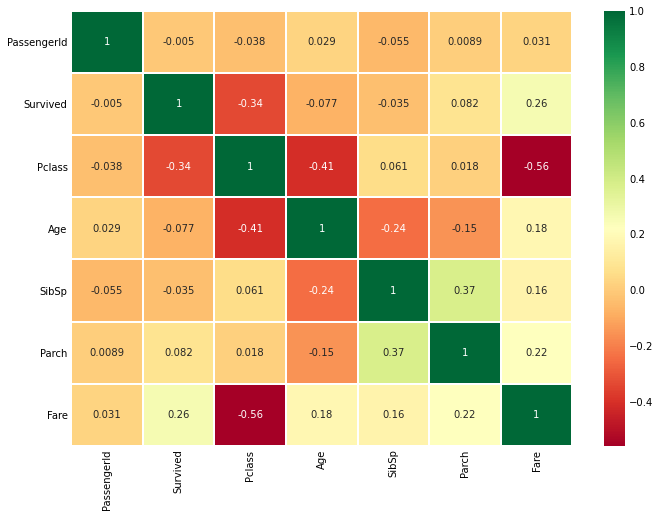

In [9]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn' , linewidths = 0.2) # data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## 2.2. Feature Engineering & Pre-processing
- 在这个部分，我们将进行这个 Pipeline 中的第二步：**特征工程**。这也是传统机器学习中最重要的部分 —— 因为这一部分中构造的特征将**直接决定**模型的表现。
- 特征工程的常用技巧有如下几种
    - **Imputation 填补**: 处理缺失数值
    - **Binning 分区**: 将一些数值划分到某些
    - **Feature Split&Combination 合并/分割特征**: 分割/合并某些特征
    - **One-Hot Encoding**: encode catogerical data
    - **Pipeline 管道**: 将多个特征处理合并到一起处理
- However, since Titanic dataset is somewhat simple, I would suggest the following [artical](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114) where feature engineering is better summarized. 
- 在这个部分有**个 TODO**

### 2.2.1 Initials / Ages (Imputation/填补)
- The first thing we'd like to investigate is whether age could decide one's survival
- If you remember, there are lots of `nan` in the `Age` column, in order to fill those blanks with appropriate age, what we will do is to find the initial of every person and find the average age for each initial.
- Then we will fill those `nan` in `Age` column with average age of that initial. (**Think about this, does this make sense?**)

In [10]:
# 先看看 age 列有多少 NaN
data.Age.isnull().sum()

263

In [11]:
import re # Use regular expression（正则表达式）

# Do Not modify this cell, just run it.
data['initial'] = data.Name.apply(lambda s: re.findall(r'([A-Za-z]+)\.', s)[0]) 
data[['Name', 'initial']].head()

,Name,initial
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


- For more information about the use of regular expression, here is a useful link: [Python regular expression](https://www.tutorialspoint.com/python/python_reg_expressions.htm)
- **It is not required for you to know regular expression for this project, but it's encouraged to learn it on your own (it takes a while to understand it!).**

- Now, take a look at our results of initials:

In [12]:
# As you can see here, there is too many unique initials, 
# while some of them could be manually classified into the same one 
data.initial.unique() 

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [13]:
# DO NOT modify this cell, just run it (try to understand the use of pd.replace() function!)
data.initial = data.initial.replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss']
)

In [14]:
data.initial.unique() # Looks good now!

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

**TODO 2.1:** 对于每个 initial 组，计算平均年龄，然后将所有`nan`的地方填上 ta 所在年龄组的平均年龄
- Hint: make use of `pd.groupby()` function, [link to doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- Hint: make use of `pd.fillna()` function, [link to doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [15]:
# Your Code Starts Here
data.groupby('initial').agg(np.mean)['Age']

initial
Master     5.482642
Miss      21.914372
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

In [16]:
# Your Code Starts Here
data.loc[(data.Age.isnull()) & (data.initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.initial == 'Mrs'), 'Age'] = 37
data.loc[(data.Age.isnull()) & (data.initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.initial == 'Other'), 'Age'] = 45

### 2.2.2 Age band (Binning/分区)
- 在这个部分，我们会将年龄分为 5 个类，这样做有助于将一个复杂的 feature 变成一个简单的 feature
- **TODO 2.2:** Implement the function `handle_age_band` and apply it to the train dataframe. Hint: use `pd.apply()` function

In [17]:
# Function to handle age band implementation
# [0-16]: 0
# [17-32]: 1
# [33-48]: 2
# [49-64]: 3
# [>64]: 4
def handle_age_band(age):
    if age <= 16:
        return 0
    # Your Code Starts Here  
    if age <= 32:
        return 1
    if age <= 48:
        return 2
    if age <= 64:
        return 3
    return 4
    #return -1 # Modify here
    # Your Code Ends Here


# Your Code Starts Here
data['age_band'] = data.Age.apply(handle_age_band)
# Your Code Ends Here
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset,initial,age_band
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs,2


### 2.2.3 Family Size (Feature Combination)
- we would also like to investigate whether family size have an impact on passenger's survival

- **TODO 2.3:** Here we create a new feature called `family_size` which is the sum of `Parch` and `SibSp` columns for each row; also, create another column called `alone` where 1 means traveling without families and 0 otherwise.

In [18]:
# Your Code Starts Here
data['family_size'] = data.Parch + data.SibSp
data['alone'] = data.family_size.apply(lambda x: 1 if x == 0 else 0) # hint: make use of pd.apply() function on family_size column
# Your Code Ends Here

In [19]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset,initial,age_band,family_size,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr,1,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs,2,1,0


### 2.2.4 Checking null values again

In [20]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dataset           0
initial           0
age_band          0
family_size       0
alone             0
dtype: int64

**TODO 2.4:** 把数据集里的其他 NaN 数值进行填充
- Hint: make use of `pd.fillna()` function, [link to doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [21]:
# Examples
data.Embarked = data.Embarked.fillna('S') # Because 'S' is the most common embark (登船) location.

# TODO: handle other null values, if there is any; if not, just ignore it
# Note: if there is null in the 'Survived' column, it's fine.

# Your Code Starts Here
fare_median = data.Fare.median()
data.Fare = data.Fare.fillna(fare_median) # Fill the nan values in fare columns with median value of passenger fare.
# Your Code Ends Here

In [22]:
# Drop un-needed features
data = data.drop(columns = ['Name', 'Ticket', 'PassengerId', 'Cabin', 'Age'])

In [23]:
data.isna().sum()

Survived       418
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dataset          0
initial          0
age_band         0
family_size      0
alone            0
dtype: int64

### 2.2.5 One-hot Encoding
- In this section, we will look at another important feature engineering process, specially designed for categorical data: **One-hot Encoding**.
- The idea behind one-hot encoding is simple: instead of using categorical labels, we use several seperate columns for each label (see example below).
- Through one-hot encoding, we could tramsfrom data from some format that the model couldn't take as an input(text, image, etc) into vectors that the model could calculate.

In [39]:
# Original data
original = pd.DataFrame({
    'name': ['Joey', 'Scott', 'Jasmine', 'Alan', 'Mao'],
    'Major': ['DataSci', 'DataSci', 'CogsSci', 'DataSci', 'CompSci']
})
onehot = pd.DataFrame({
    'name': ['Joey', 'Scott', 'Jasmine', 'Alan', 'Mao'],
    'DataSci': [1, 1, 0, 1, 0],
    'CogsSci': [0, 0, 1, 0, 0],
    'CompSci': [0, 0, 0, 0, 1]
})

display(original, onehot)

,name,Major
0,Joey,DataSci
1,Scott,DataSci
2,Jasmine,CogsSci
3,Alan,DataSci
4,Mao,CompSci


,name,DataSci,CogsSci,CompSci
0,Joey,1,0,0
1,Scott,1,0,0
2,Jasmine,0,1,0
3,Alan,1,0,0
4,Mao,0,0,1


- The way to achieve these encoded features is simple: Sci-kit Learn already has package for this:
    - [One-hot Encoder from Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
    - **Note**: the output for this transformer is a matrix, which is kind of hard to debug.

In [40]:
# This is a quick way of "query" into the dataframe, like a SQL query. 
train_df = data.query('dataset == "Train"').drop(columns = ['dataset'])

# We don't need survived column for test set.
test_df = data.query('dataset == "Test"').drop(columns = ['Survived', 'dataset']) 

In [41]:
X_train, y_train = train_df.drop(columns = ['Survived']), train_df.Survived.values

- **TODO 2.5:** 对 initial 这一列进行 one-hot encoding

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore') # remember to set 'handle_unknown' to 'ignore'!
enc.fit(train_df[['initial']])

OneHotEncoder(handle_unknown='ignore')

In [43]:
enc.categories_

[array(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype=object)]

In [44]:
enc.transform(train_df[['initial']]) # As you can see, the result is a sparse matrix

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [45]:
print('Shape of encoded:', enc.transform(train_df[['initial']]).todense().shape)
enc.transform(train_df[['initial']]).todense() # take a look a it, it's a matrix

Shape of encoded: (891, 5)


matrix([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

### 2.2.6 Normalization/归一化
- **TODO 2.6:** 对 `Fare` 这一列进行归一化
- [Scikit Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss = StandardScaler()
ss.fit(train_df[['Fare']])

StandardScaler()

In [48]:
ss.transform(train_df[['Fare']])[:5]

array([[-0.50244517],
       [ 0.78684529],
       [-0.48885426],
       [ 0.42073024],
       [-0.48633742]])

In [49]:
train_df[['Fare']].head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


### 2.2.7 Pipeline & ColumnTransformer
- **TODO 2.7:** 将 one-hot encoding 和其他的 feature transform 都塞进 Pipeline 里
- [Scikit Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [50]:
train_df.head(2) # 这里的 Survived 是不需要的！

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,initial,age_band,family_size,alone
0,0.0,3,male,1,0,7.2500,S,Mr,1,1,0
1,1.0,1,female,1,0,71.2833,C,Mrs,2,1,0


In [51]:
X_train, y_train = train_df.drop(columns = ['Survived']), train_df.Survived.values
X_test = test_df

In [52]:
# handle application features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Your Code Starts Here
num_feat = ['Fare']
num_trans = Pipeline(
    steps = [
        ('scalar', StandardScaler())
    ])

one_hot = OneHotEncoder(handle_unknown = 'ignore')
cat_feat = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'initial', 'age_band', 'family_size', 'alone']
cat_trans = Pipeline(
    steps = [
        ('onehot', one_hot)
    ])

ct = ColumnTransformer(
    transformers = [
        ('num', num_trans, num_feat),
        ('cat', cat_trans, cat_feat)
    ])
ct = ct.fit(X_train)
# Your Code Ends Here

In [53]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [54]:
print(X_train.shape, y_train.shape, X_test.shape)

(891, 44) (891,) (418, 44)


## 2.3. Model Selection
- 在这一部分，我们将训练并挑选最合适的模型。在开始之前，我们需要定义我们评判模型好坏的标准（Metric）。注意这和 Loss function 并不一样：
    - Loss function: 在 training 的过程中使用，取决于特定机器学习任务（e.g. 分类 / 回归）
    - Metric: 在训练结束后使用，也取决于特定机器学习任务（e.g. 分类 / 回归）
- 在这个部分，一共有 **1 个 TODO**

In [56]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.naive_bayes import GaussianNB #Naive bayes

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [57]:
X, y = X_train.copy(), y_train.copy() # Save the training set for future use
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

- After creating validation set, we started to try some Sci-kit models for machine learning:
    - `SVC ` (Support Vector Classification)
    - `Logistic Regression`
- For both of them, we will try various model parameters in order to find out the best model

In [58]:
# SVC model
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(X_train, y_train)
prediction1 = model.predict(X_val)
print('Val acc for rbf SVM is ', metrics.accuracy_score(prediction1, y_val))

Val acc for rbf SVM is  0.8440677966101695


- **TODO 2.8**: 
    - Step 1 请阅读以下两个 documentation：[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 和 [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 尤其注意 `C` 和 `gamma` 这两个超参数
    - Step 2 从上面那个 cell 复制代码（SVM 模型）到下方的 cell 中，并尝试不同的 `C` 和 `gamma` 数值，观察模型的表现
    - Step 3 尝试使用 Logistic Regression 来进行同样的分类 (try `C` = 0.1, 1, 10 and keep the one w/ best acc)

In [64]:
# Your Code Starts Here - SVC
all_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
all_gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
all_result = []
for c in all_c:
    for g in all_gamma:
        model = svm.SVC(kernel = 'rbf', C = c, gamma = g)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        #print('Val acc for rbf SVM is ', metrics.accuracy_score(prediction1, y_val))
        acc = metrics.accuracy_score(y_pred, y_val)
        all_result.append({
            'c': c,
            'gamma': g,
            'acc': acc
        })
# Your Code Ends Here

In [65]:
display(pd.DataFrame(all_result).sort_values(by = 'acc', ascending = False).head())

,c,gamma,acc
29,10.0,0.010,0.847458
23,1.0,0.100,0.844068
42,1000.0,0.001,0.840678
36,100.0,0.010,0.840678
35,100.0,0.001,0.837288


In [67]:
# Your Code Starts Here - Logistic Regression
all_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
all_result = []
for c in all_c:
    model = LogisticRegression(C = c, max_iter = 1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    #print('Val acc for rbf SVM is ', metrics.accuracy_score(prediction1, y_val))
    acc = metrics.accuracy_score(y_pred, y_val)
    all_result.append({
        'c': c,
        'acc': acc
    })
# Your Code Ends Here

In [68]:
display(pd.DataFrame(all_result).sort_values(by = 'acc', ascending = False).head())

,c,acc
3,1.0,0.837288
2,0.1,0.827119
4,10.0,0.827119
5,100.0,0.820339
6,1000.0,0.816949


## 2.4. Model Testing
- 在这个部分，我们将根据预先确定的 metric 来挑选最合适的数据集
- 这个部分有 **1 个 TODO**
- **TODO 2.9:** 从上面的模型和参数中选出一个最合适的模型以及它最好的参数

In [85]:
# Your Code Starts Here
model = svm.SVC(kernel = 'rbf', C = 10.0, gamma = 0.01) # Pick the best model
# Your Code Ends Here

model.fit(X_train, y_train)
prediction = model.predict(X_test)

test_passenger_id = pd.read_csv('data/test.csv').PassengerId.values
test['PassengerId'] = test_passenger_id
test['Survived'] = prediction.astype('int')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test,1


In [86]:
# prediction.astype('int')

## 2.5. Export Prediction & Submission
- Submit to this website: https://www.kaggle.com/c/titanic/submit

In [87]:
# Make sure your submission looks like this
pd.read_csv('data/gender_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
test[['PassengerId', 'Survived']].to_csv('data/submission.csv', index = False)

In [89]:
test[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# The End.